In [1]:
# import as needed
import mesa_reader as mr
import matplotlib.pylab as plt
import numpy as np
import os
from math import log
from scipy.integrate import cumtrapz

G = 6.67408e-11 # gravitational constant
# change G to cgs units
G = G * 1e3

In [2]:
# find and import the profile closest to your target profile

def getClosestModel(modelNumber, workingDirectory):
    print('Looking for the profile closest to model #' + str(modelNumber) + ' in ' + str(workingDirectory))
    filenames = []

    for root, dirs, files in os.walk(workingDirectory):
        for file in files:
            if file.endswith("profiles.index"):
                filenames.append(os.path.join(root, file))

    profiles = []
    # import files
    for file in filenames:
        i = mr.MesaProfileIndex(file)
        profiles.append(i)

    # find the closest model number - ugly but functional
    closest = 0
    diff = 1e10
    profilePath = ''
    j = 0
    for index in profiles:
        values = index.model_numbers
        profileNums = index.profile_numbers
        k=0
        for i in values:
            if (abs(modelNumber - i) < diff):
                diff = abs(modelNumber - i)
                closest = i
                og = filenames[j]
                og = og[:-14] # put together the file name given the directory
                profilePath = og + 'profile' + str(profileNums[k]) + '.data'
            k+=1
        j+=1

    print('difference: ' + str(diff))
    print('model number: ' + str(closest))
    print('file path: ' + str(profilePath))
    print('')

    # import target profile
    p = mr.MesaData(profilePath)
    return p

directory = '/Users/emilyflynn/Desktop/25M_tests/15M_logs/'
p15 = getClosestModel(2050, directory)

directory = '/Users/emilyflynn/Desktop/25M_tests/20M_logs/'
p20 = getClosestModel(2377, directory)

directory = '/Users/emilyflynn/Desktop/25M_tests/25M_logs/'
p25 = getClosestModel(394, directory)

directory = '/Users/emilyflynn/Desktop/25M_tests/30M_logs/'
p30 = getClosestModel(294, directory)

directory = '/Users/emilyflynn/Desktop/25M_tests/50M_logs/'
p50 = getClosestModel(189, directory)

directory = '/Users/emilyflynn/Desktop/25M_tests/70M_logs/'
p70 = getClosestModel(905, directory)

Looking for the profile closest to model #2050 in /Users/emilyflynn/Desktop/25M_tests/15M_logs/
difference: 0
model number: 2050
file path: /Users/emilyflynn/Desktop/25M_tests/15M_logs/profile48.data

Looking for the profile closest to model #2377 in /Users/emilyflynn/Desktop/25M_tests/20M_logs/
difference: 23
model number: 2400
file path: /Users/emilyflynn/Desktop/25M_tests/20M_logs/profile55.data

Looking for the profile closest to model #394 in /Users/emilyflynn/Desktop/25M_tests/25M_logs/
difference: 6
model number: 400
file path: /Users/emilyflynn/Desktop/25M_tests/25M_logs/LOGS_to_si_burn/profile2.data

Looking for the profile closest to model #294 in /Users/emilyflynn/Desktop/25M_tests/30M_logs/
difference: 6
model number: 300
file path: /Users/emilyflynn/Desktop/25M_tests/30M_logs/LOGS_before_remove/profile13.data

Looking for the profile closest to model #189 in /Users/emilyflynn/Desktop/25M_tests/50M_logs/
difference: 11
model number: 200
file path: /Users/emilyflynn/Desktop/

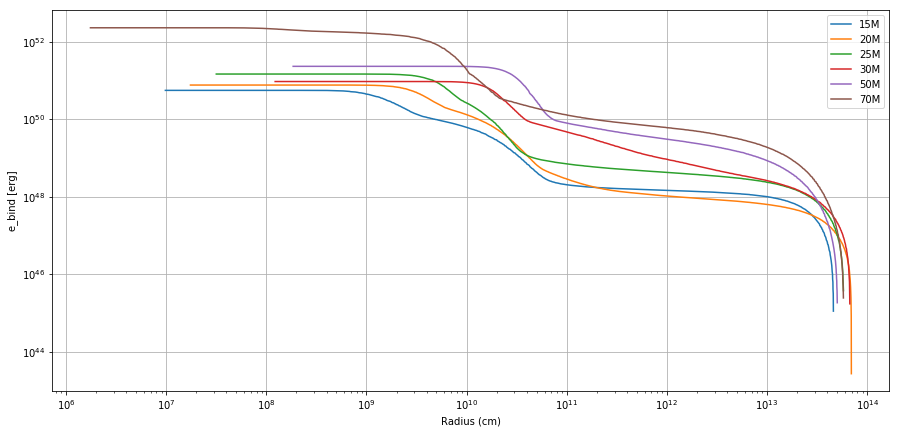

In [3]:
# find e_bind, energy needed to strip the envelope's mass to radius r - eq 4

fig, ax = plt.subplots(figsize=(15,7))
plt.xlabel('Radius (cm)')
plt.ylabel('e_bind [erg]')
# plt.xlim(1e9, 1e13)
# plt.ylim(1e44, 1e50)
plt.grid(True)

def plotEbinds(p):
    r = p.radius     # bring in the radius

    r = r*69.551e9   # change units to cm
    r = r[100:]      # cut off the first 100 points - takes care of surface weirdness

    m = p.mass
    m = m*1.989e33   # change units to grams
    m = m[100:]      # exclude first 100 points

    # integrate
    integrand = []

    for i in range(len(m)):
        x = G * m[i] / r[i]
        integrand.append(x)

    ebind = cumtrapz(y=integrand, x=m)
    
    plt.loglog(r[:-1], -ebind)
    return

plotEbinds(p15)
plotEbinds(p20)
plotEbinds(p25)
plotEbinds(p30)
plotEbinds(p50)
plotEbinds(p70)

plt.legend(('15M', '20M', '25M', '30M', '50M', '70M'))

In [ ]:
# eq 7